# Project Overview:

**Objective:** Analyze medical insurance charges to uncover factors influencing costs and potentially predict future charges.

**Dataset:**  A dataset of 2772 health insurance records, including age, gender, BMI, smoking status, region, number of children, and insurance charges.

**Tools:**  Employing Python libraries, including Pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn for data manipulation, visualization, and machine learning tasks.



### Import The Libraries

In [25]:
### Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
pastel_palette = sns.color_palette("pastel")
sns.set_palette(pastel_palette)

In [26]:
headers = ["Age", "Gender", "BMI", "No_of_children", "Smoker", "Region", "Charges"]
csv = "/Users/shani/Desktop/Insurence/medical_insurance_dataset.csv"
df = pd.read_csv(csv, header = None, names = headers)
df.head(5)

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [27]:
#replace the '?' entries with 'NaN' values
df.replace('?', np.nan, inplace=True)

In [28]:
# Basic information
df.shape

(2772, 7)

In [29]:
df.dtypes

Age                object
Gender              int64
BMI               float64
No_of_children      int64
Smoker             object
Region              int64
Charges           float64
dtype: object

### Data Wrangling

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2768 non-null   object 
 1   Gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   No_of_children  2772 non-null   int64  
 4   Smoker          2765 non-null   object 
 5   Region          2772 non-null   int64  
 6   Charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


## Handling Missing Data
- Continuous arrtibutes - replace missing values with mean
- Categorical attributes - replace missing values with the most frequent value
- Update the data types of the respective columns.

In [31]:
# smoker is a categorical attribute, replace with most frequent entry
most_fre_smoker = df['Smoker'].value_counts().idxmax()
df["Smoker"].replace(np.nan, most_fre_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['Age'].astype('float').mean(axis=0)
df["Age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["Age","Smoker"]] = df[["Age","Smoker"]].astype("int")

In [32]:
null_count_per_column = df.isnull().sum()
print(null_count_per_column)

Age               0
Gender            0
BMI               0
No_of_children    0
Smoker            0
Region            0
Charges           0
dtype: int64


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2772 non-null   int64  
 1   Gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   No_of_children  2772 non-null   int64  
 4   Smoker          2772 non-null   int64  
 5   Region          2772 non-null   int64  
 6   Charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [34]:
df[["Charges"]] = np.round(df[["Charges"]],2)
print(df.head())

   Age  Gender     BMI  No_of_children  Smoker  Region   Charges
0   19       1  27.900               0       1       3  16884.92
1   18       2  33.770               1       0       4   1725.55
2   28       2  33.000               3       0       4   4449.46
3   33       2  22.705               0       0       1  21984.47
4   32       2  28.880               0       0       1   3866.86


## Exploratory Data Analysis (EDA)

(0.0, 66902.85800000001)

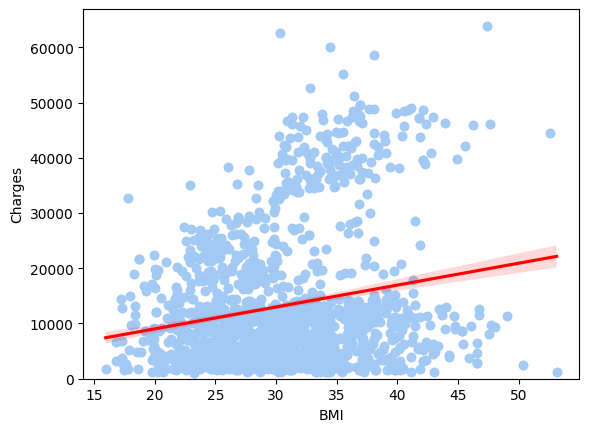

In [35]:
#regression plot for charges and bmi
sns.regplot(x='BMI', y= "Charges", data = df, line_kws={"color": "red"})
plt.ylim(0,)

<Axes: >

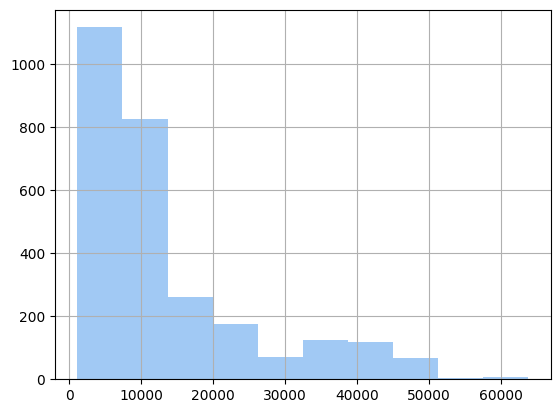

In [36]:
df['Charges'].hist()

Charges is right-skewed (Non-normal )distribution.

<Axes: xlabel='Smoker', ylabel='Charges'>

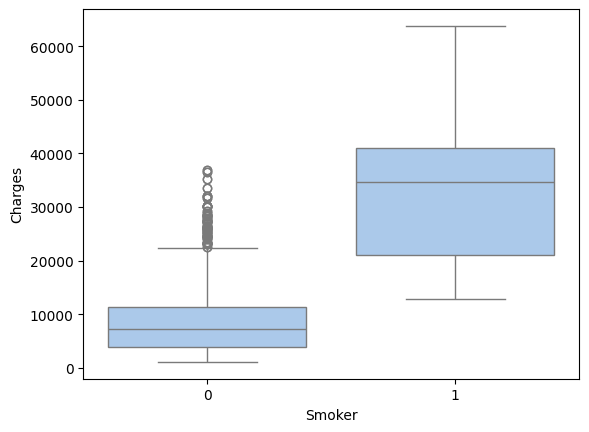

In [37]:
sns.boxplot(x="Smoker", y="Charges", data=df)

In [38]:
df.corr()

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
Age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
Gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
BMI,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
No_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
Smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
Region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
Charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


# Model Development

## Model 1: Using Only "Smoker" Attribute:

In [39]:
x = df[['Smoker']]
y = df[['Charges']]
lm = LinearRegression()
lm.fit(x,y)
print(lm.score(x,y))

0.6221791733924185


R^2 is a good fit for our model

## Model 2: Using All Other Attributes
Now, we are comparing between  2 modeles to evaluate which model performs better in predicting the "charges" values.

In [40]:
# Assuming df is your DataFrame
# definition of Y and lm remain same as used in last cell. 
Z = df[["Age", "Gender", "BMI", "No_of_children", "Smoker", "Region"]]
lm.fit(Z,y)
print(lm.score(Z, y))

0.7504083820289634


**Key Findings:**

- **Smoking Status:** Smoking has a strong positive correlation with insurance charges. Smokers have significantly higher charges than non-smokers.

- **BMI:** BMI has a positive correlation with charges, indicating higher costs associated with greater body mass index.

- **Model Improvement :** A model incorporating multiple factors (age, gender, BMI, smoking status, region, and number of children) achieves an R-squared of 0.75, suggesting that these factors collectively contribute to predicting charges (i.e wee see an improvement in the performance).

Smoker explain the majority of the variability in "charges" variable.
This indicates "smoker" is important variable in predicting "charges".


# Creating a model that can predict the "Charges" value using all the other attributes of the dataset:

In [41]:
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
print(r2_score(y,ypipe))

0.8452397065969194


We can see further improvments in the model

# Model Refinement
## Data Splitting

In [42]:
# Assuming 'data' is your dataset and 'labels' are corresponding labels/targets

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 'test_size=0.2' reserves 20% of the data for testing
# 'random_state=42' ensures reproducibility, the same split every time you run this code

# Check the shapes of the resulting datasets
print("Training set shape (X_train):", x_train.shape)
print("Testing set shape (X_test):", x_test.shape)
print("Training labels shape (y_train):", y_train.shape)
print("Testing labels shape (y_test):", y_test.shape)

Training set shape (X_train): (2217, 1)
Testing set shape (X_test): (555, 1)
Training labels shape (y_train): (2217, 1)
Testing labels shape (y_test): (555, 1)


## Ridge Regression

In [43]:
# Ridge Regression without Polynomial Features
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.5991181787450695


## Polynomial Features with Ridge Regression

In [44]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.5991269967260672
